In [1]:
import os
import csv
import requests
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = 'http://www.anp.gov.br/images/dadosabertos/precos/2019-04-gasolina-etanol.csv'
response = requests.get(url)
with open(os.path.join("data", "2019-04-gasolina-etanol.csv"), 'w') as f:
    f.write(response.content.decode('utf16'))

In [3]:
data = pd.read_csv("data/2019-04-gasolina-etanol.csv", sep="\t", encoding="utf-8")

In [4]:
data.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,Instalação - Código,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,CO,DF,BRASILIA,AUTO POSTO LAZZAT LTDA,7770,ETANOL,01/04/2019,"3,259","3,0092",R$ / litro,BRANCA
1,CO,DF,BRASILIA,CALLTECH COMBUSTIVEIS E SERVICOS LTDA,153708,ETANOL,01/04/2019,"3,399",NaN,R$ / litro,IPIRANGA
2,CO,DF,BRASILIA,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,192986,ETANOL,01/04/2019,"3,199",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,CO,DF,BRASILIA,DISTRIBUIDORA BRASILIA DE VEICULOS S.A.,8085,ETANOL,01/04/2019,"3,289",NaN,R$ / litro,RAIZEN
4,CO,DF,BRASILIA,"GOES COMBUSTIVEIS, LUBRIFICANTES E GLP LTDA",7885,ETANOL,01/04/2019,"3,399","3,0803",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [5]:
data = data.dropna()

In [6]:
data["Valor de Compra"] = data["Valor de Compra"].str.replace(",", ".")
data["Valor de Venda"] = data["Valor de Venda"].str.replace(",", ".")

In [7]:
data.dtypes

Região - Sigla         object
Estado - Sigla         object
Município              object
Revenda                object
Instalação - Código     int64
Produto                object
Data da Coleta         object
Valor de Venda         object
Valor de Compra        object
Unidade de Medida      object
Bandeira               object
dtype: object

In [8]:
data["Região - Sigla"] = data["Região - Sigla"].astype('category')
data["Estado - Sigla"] = data["Estado - Sigla"].astype('category')
data["Município"] = data["Município"].astype('category')
data["Revenda"] = data["Revenda"].astype('category')
data["Instalação - Código"] = data["Instalação - Código"].astype('category')
data["Produto"] = data["Produto"].astype('category')
data["Valor de Venda"] = data["Valor de Venda"].astype(float)
data["Valor de Compra"] = data["Valor de Compra"].astype(float)
data["Valor de Venda"] = data["Valor de Venda"].astype(float)
data["Unidade de Medida"] = data["Unidade de Medida"].astype('category')
data["Bandeira"] = data["Bandeira"].astype('category')

In [9]:
data["Data da Coleta"] = pd.to_datetime(data["Data da Coleta"], format='%d/%m/%Y')

In [10]:
# fig, ax = plt.subplots(figsize=(15,7))
pd.DataFrame(data.groupby(['Região - Sigla', 'Produto'])['Valor de Venda', 'Produto']
             .mean())

Valor de Venda
Região - Sigla Produto                 
CO             ETANOL          3.056469
               GASOLINA        4.408860
N              ETANOL          3.698063
               GASOLINA        4.535871
NE             ETANOL          3.506053
               GASOLINA        4.532407
S              ETANOL          3.427119
               GASOLINA        4.468537
SE             ETANOL          3.124076
               GASOLINA        4.430554

In [11]:
cps = data[data.Município.isin(['CAMPINAS'])]

In [12]:
cps.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,Instalação - Código,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
17863,SE,SP,CAMPINAS,AUTO POSTO 100 LTDA.,169492,ETANOL,2019-04-01,2.787,2.3051,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
17864,SE,SP,CAMPINAS,AUTO POSTO APPALOOSA LTDA,55918,ETANOL,2019-04-01,2.999,2.3742,R$ / litro,IPIRANGA
17865,SE,SP,CAMPINAS,AUTO POSTO CAMPO DOS AMARAIS LTDA,55928,ETANOL,2019-04-01,2.799,2.3740,R$ / litro,IPIRANGA
17866,SE,SP,CAMPINAS,AUTO POSTO CB PAR CAMPINAS LTDA,216642,ETANOL,2019-04-01,2.599,2.3600,R$ / litro,BRANCA
17867,SE,SP,CAMPINAS,AUTO POSTO ESKEMA LTDA,55978,ETANOL,2019-04-01,2.799,2.3435,R$ / litro,IPIRANGA


ETANOL           AxesSubplot(0.1,0.15;0.363636x0.75)
GASOLINA    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

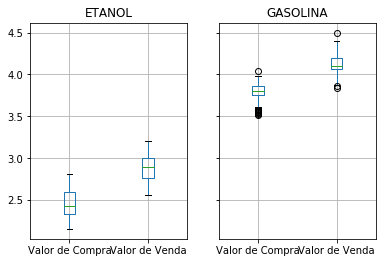

In [13]:
cps.groupby(['Produto']).boxplot(column=['Valor de Compra', 'Valor de Venda'])

ETANOL           AxesSubplot(0.1,0.15;0.363636x0.75)
GASOLINA    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

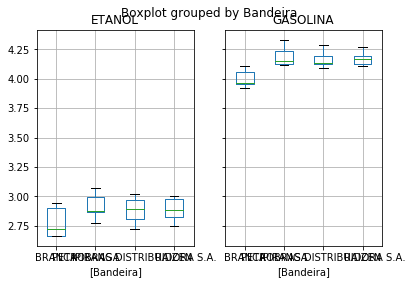

In [14]:
# cps.boxplot(x = 'Data da Coleta', y='Valor de Venda')
pd.DataFrame(cps.groupby(['Data da Coleta', 'Bandeira', 'Produto'])['Valor de Venda'].mean()).groupby(['Produto']).boxplot(by='Bandeira')

Bandeira                      Produto 
BRANCA                        ETANOL      AxesSubplot(0.125,0.125;0.775x0.755)
                              GASOLINA    AxesSubplot(0.125,0.125;0.775x0.755)
IPIRANGA                      ETANOL      AxesSubplot(0.125,0.125;0.775x0.755)
                              GASOLINA    AxesSubplot(0.125,0.125;0.775x0.755)
PETROBRAS DISTRIBUIDORA S.A.  ETANOL      AxesSubplot(0.125,0.125;0.775x0.755)
                              GASOLINA    AxesSubplot(0.125,0.125;0.775x0.755)
RAIZEN                        ETANOL      AxesSubplot(0.125,0.125;0.775x0.755)
                              GASOLINA    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

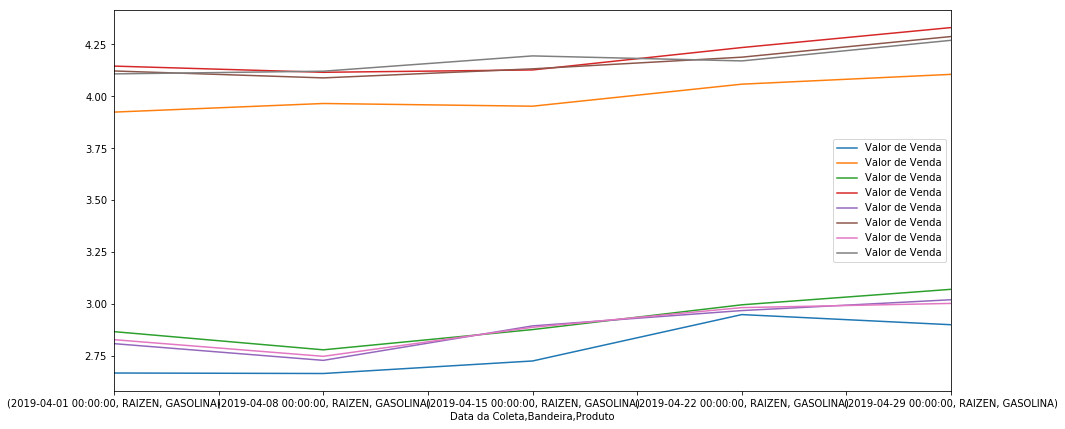

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
#pd.DataFrame(cps.groupby(['Data da Coleta', 'Bandeira'])['Valor de Venda'].mean()).unstack().plot(ax=ax)
pd.DataFrame(cps.groupby(['Data da Coleta', 'Bandeira', 'Produto'])['Valor de Venda'].mean()).groupby(['Bandeira', 'Produto']).plot(ax=ax)

Produto
ETANOL      AxesSubplot(0.125,0.125;0.775x0.755)
GASOLINA    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

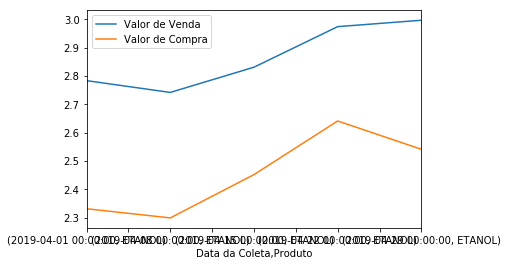

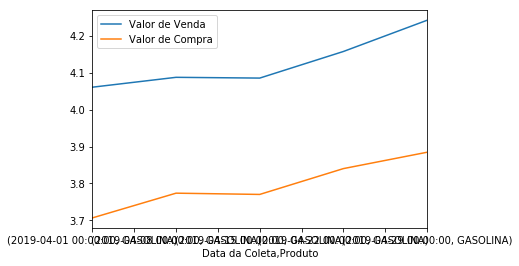

In [16]:
#fig, ax = plt.subplots(figsize=(15,7))
# cps['Diff'] = cps['Valor de Venda'] - 'Valor de Compra'
pd.DataFrame(cps.groupby(['Data da Coleta', 'Produto'])['Valor de Venda', 'Valor de Compra'].mean()).groupby(['Produto']).plot()